In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
url = 'House_Rent_Dataset.csv'
data = pd.read_csv(url)
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
len(data)

4746

### Fixing Data

In [4]:
data.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

#### 1.2 Missing values

In [5]:
data.isnull().sum().sort_values(ascending=False)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

There is not missing data

#### 1.3 Noisy data - outliers

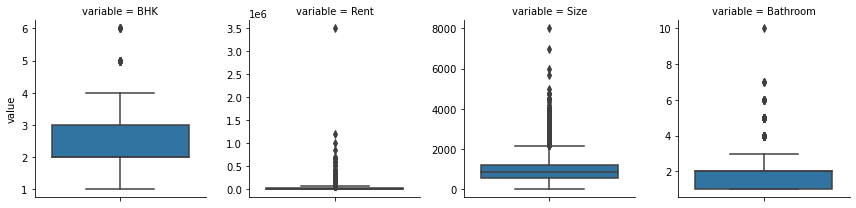

In [6]:
features = ['BHK', 'Rent' , 'Size' , 'Bathroom']
melted_in_df = pd.melt(data[features], value_vars = features)
g = sns.FacetGrid(data = melted_in_df, col="variable",  col_wrap=4, sharey=False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()


There is not noisy data

### 2. Correlations - patterns in the data

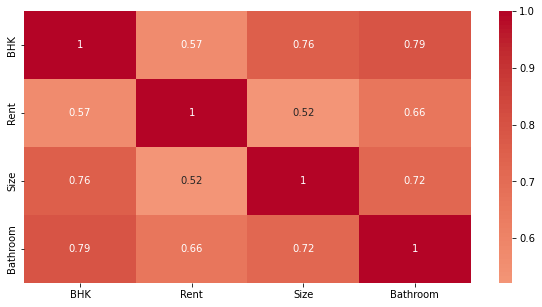

In [7]:
corrs = data[features].corr(method = 'spearman')
plt.figure(figsize=(10,5))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

Connections were found in all the features, but they are logical

### 3. Observations

## Location analysis by rent

In [10]:
data_city = data.pivot_table(index='City', columns='Area Type', values='Rent', aggfunc='median')
data_city

Area Type,Built Area,Carpet Area,Super Area
City,,,
Bangalore,NaN,18000.0,12000.0
Chennai,15000.0,16000.0,13000.0
Delhi,NaN,20000.0,14000.0
Hyderabad,6000.0,17000.0,13000.0
Kolkata,NaN,8500.0,8000.0
Mumbai,NaN,57000.0,29250.0


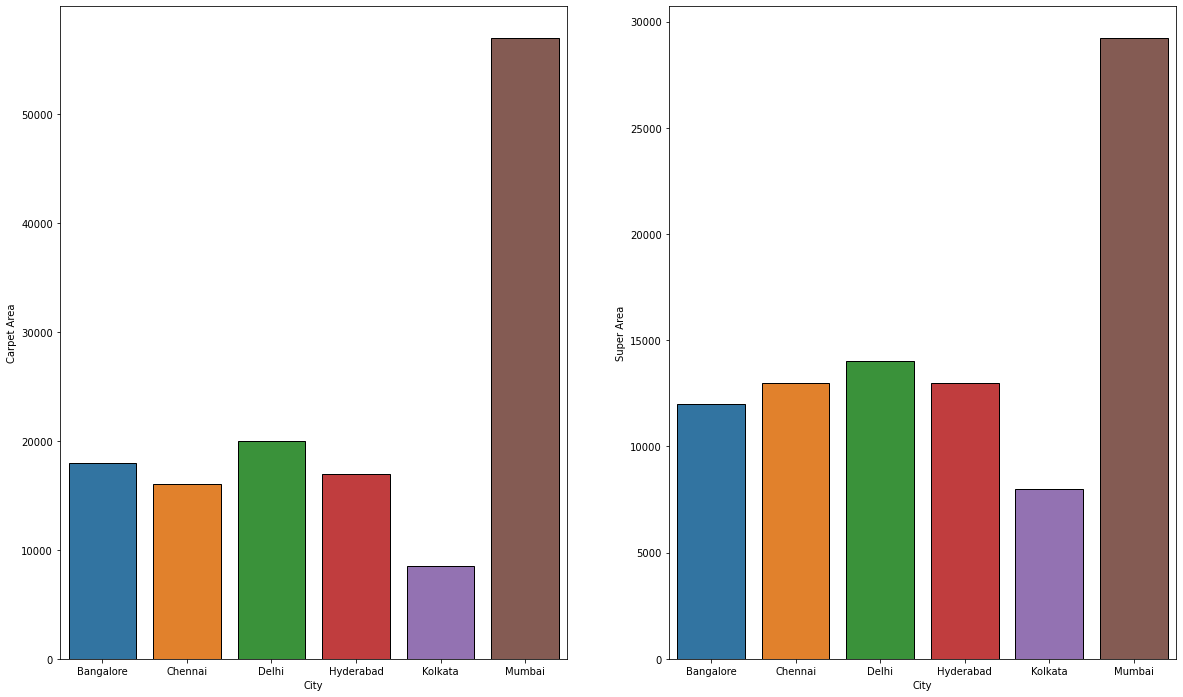

In [11]:
fig, axes = plt.subplots(figsize=(20, 12), ncols=2)
plt1 =sns.barplot(data = data_city ,x=data_city.index, y='Carpet Area',edgecolor = 'black',ax= axes[0])
plt2 =sns.barplot(data = data_city ,x=data_city.index, y='Super Area', edgecolor = 'black',ax= axes[1])

* The most expensive rent is in Mumbai
* There is a difference in rent in the cities of Bangalore and Chenhi in relation to the type of apartment

## Tenant Preferred  


In [29]:

data_Preferd = data.pivot_table(index='Tenant Preferred', columns='Area Type', values='Bathroom', aggfunc='mean')
data_Preferd['BHK'] = data.groupby('Tenant Preferred')[['BHK']].mean()
data_Preferd

Area Type,Built Area,Carpet Area,Super Area,BHK
Tenant Preferred,,,,
Bachelors,NaN,2.049204,1.913669,2.144578
Bachelors/Family,1.5,2.109290,1.777418,2.029907
Family,NaN,2.411043,2.164384,2.370763


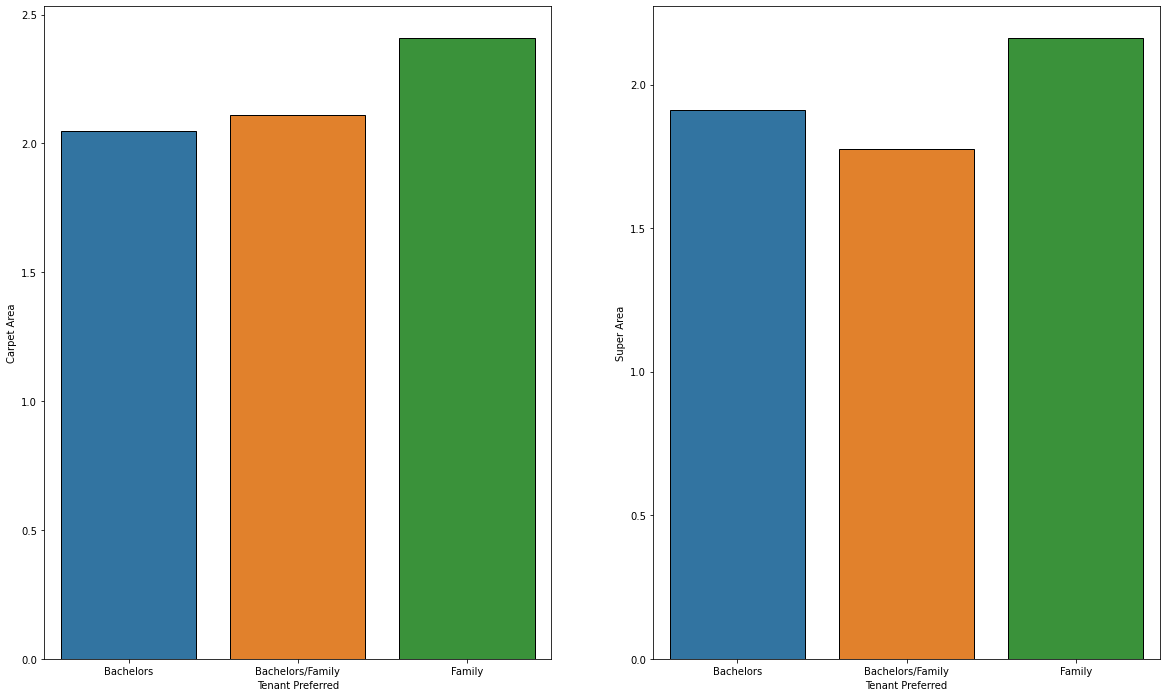

In [30]:
fig, axes = plt.subplots(figsize=(20, 12), ncols=2)
plt1 =sns.barplot(data = data_Preferd ,x=data_Preferd.index, y='Carpet Area',edgecolor = 'black',ax= axes[0])
plt2 =sns.barplot(data = data_Preferd ,x=data_Preferd.index, y='Super Area', edgecolor = 'black',ax= axes[1])

 * families thr most in the Super Area

In [31]:
# מסדר שכל הקטגוריות שהכנסנו יהיו מספריות בשביל ניבוי
features =['BHK', 'Size', 'Bathroom','City'] # להכניס כאן גם את הקטגוריה שרוצים לחזות
dumm_data = pd.get_dummies(data[features])
dumm_data.head()

,BHK,Size,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,1100,2,0,0,0,0,1,0
1,2,800,1,0,0,0,0,1,0
2,2,1000,1,0,0,0,0,1,0
3,2,800,1,0,0,0,0,1,0
4,2,850,1,0,0,0,0,1,0


In [132]:
# לטפל בערכים חסרים אם לא טיפלנו
X = dumm_data[['BHK','Size','Bathroom','City_Bangalore','City_Chennai','City_Delhi','City_Hyderabad','City_Kolkata','City_Mumbai']] # the features
y = data['Rent'] # the label

In [133]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
model = DecisionTreeRegressor(max_depth=3,random_state=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=4)

In [134]:
# פונקציה לקבלת טעות ריבועית ממוצעת 
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))

In [135]:
# הפעלה הפונקציה
eval(X_test,y_test,model)

MSE: 38997.182


In [136]:
# הדפסת עץ
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

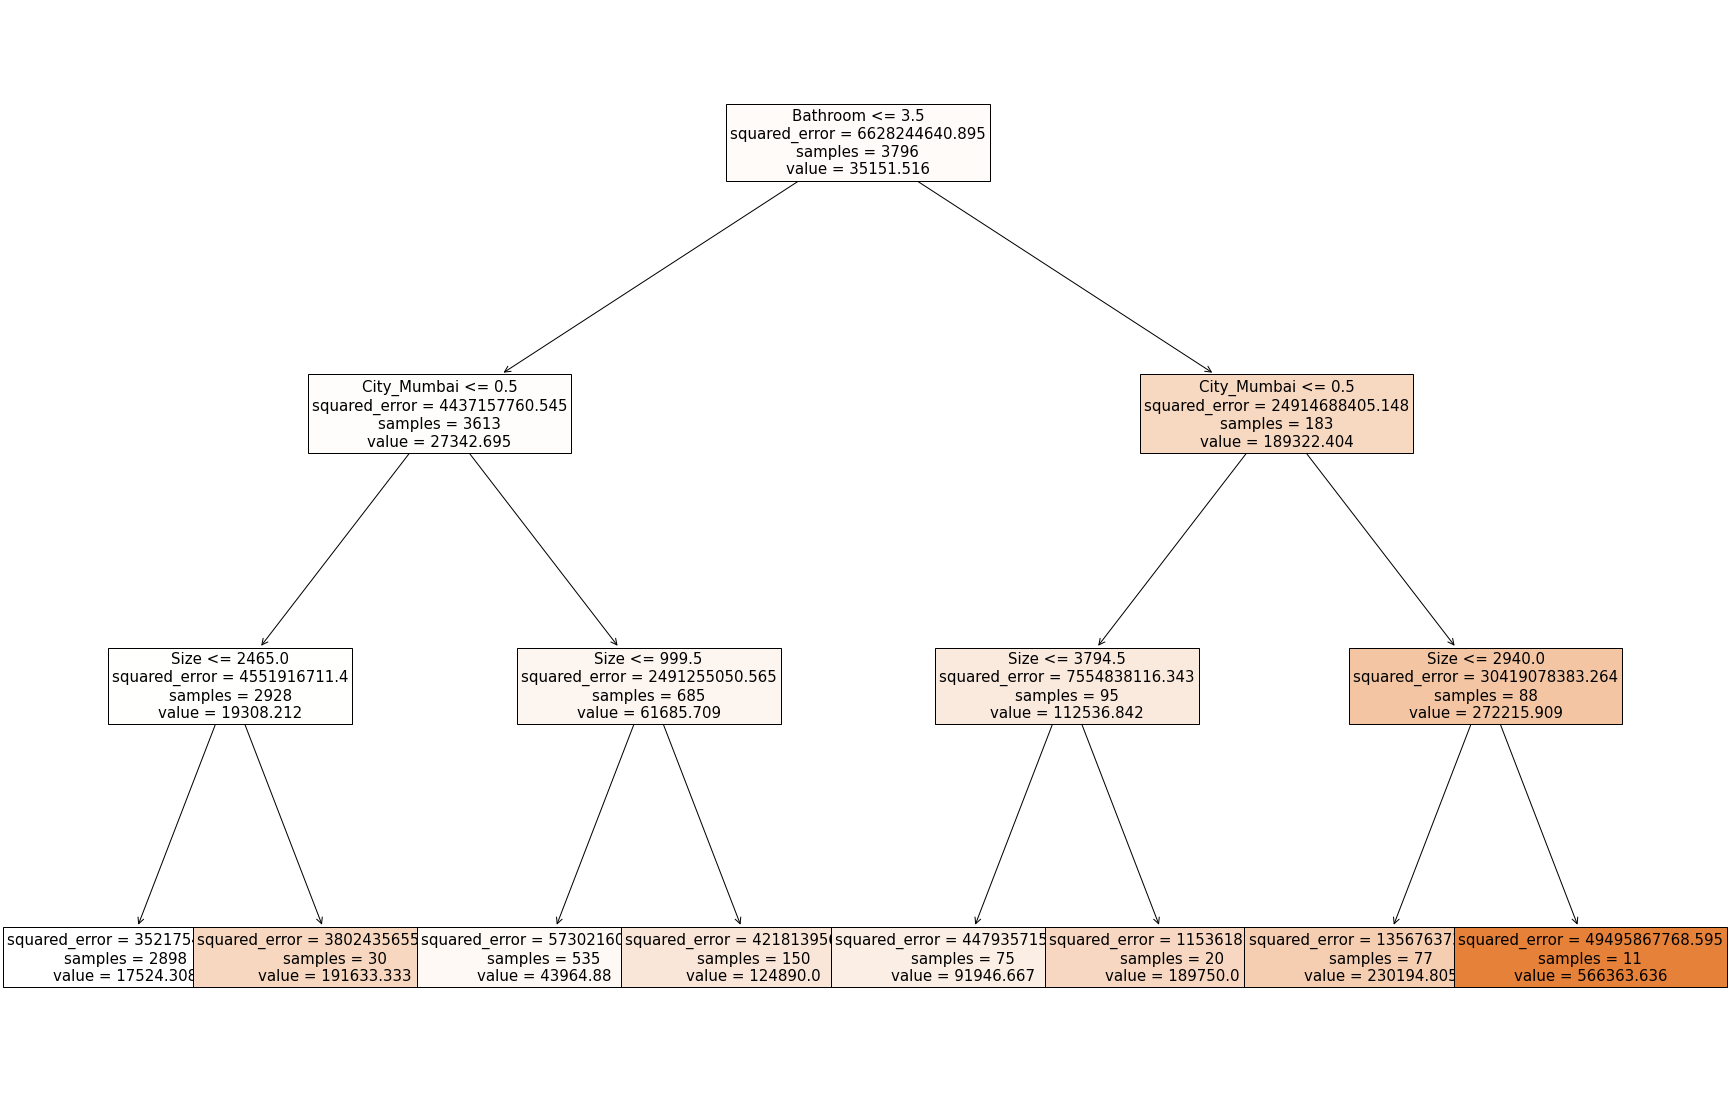

In [137]:
plot_tree(model,X_test.columns,size=(30,20))